In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [46]:
data = pd.read_csv('C:/Users/Aman/Downloads/archive/imdbtop1000.csv')
data.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [47]:
data.shape

(1000, 16)

In [48]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB
None


In [49]:
print(data.describe())

       IMDB_Rating  Meta_score   No_of_Votes
count  1000.000000  843.000000  1.000000e+03
mean      7.949300   77.971530  2.736929e+05
std       0.275491   12.376099  3.273727e+05
min       7.600000   28.000000  2.508800e+04
25%       7.700000   70.000000  5.552625e+04
50%       7.900000   79.000000  1.385485e+05
75%       8.100000   87.000000  3.741612e+05
max       9.300000  100.000000  2.343110e+06


In [50]:
# removing the unnecessary column


# Read the dataset from CSV file


# List of unnecessary columns to remove
unnecessary_columns = ['Poster_Link', 'Overview']

# Drop the unnecessary columns
data = data.drop(columns=unnecessary_columns)

# Print the updated dataset
print(data.head())


               Series_Title Released_Year Certificate  Runtime   
0  The Shawshank Redemption          1994           A  142 min  \
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  Meta_score              Director   
0                 Drama          9.3        80.0        Frank Darabont  \
1          Crime, Drama          9.2       100.0  Francis Ford Coppola   
2  Action, Crime, Drama          9.0        84.0     Christopher Nolan   
3          Crime, Drama          9.0        90.0  Francis Ford Coppola   
4          Crime, Drama          9.0        96.0          Sidney Lumet   

            Star1           Star2          Star3           Star4  No_of_Votes   
0     Tim Robbins  Morgan Freeman     Bob Gunton  William Sadler      2343110

In [51]:
print(data.isnull().sum())

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


In [52]:


# Fill null values in "Certificate" column with a specific category (e.g., "Not Rated")
data['Certificate'] = data['Certificate'].fillna("Not Rated")



In [53]:
print(data.isnull().sum())

Series_Title       0
Released_Year      0
Certificate        0
Runtime            0
Genre              0
IMDB_Rating        0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


In [54]:
# Group the data by Genre and IMDb_Rating and calculate the mean Meta_score for each group
grouped_mean = data.groupby(['IMDB_Rating'])['Meta_score'].mean()

# Fill null values in the Meta_score column with the corresponding mean values based on Genre and IMDb_Rating
data['Meta_score'].fillna(data.groupby(['IMDB_Rating'])['Meta_score'].transform('mean'), inplace=True)

# Check the updated dataset
print(data.head())

               Series_Title Released_Year Certificate  Runtime   
0  The Shawshank Redemption          1994           A  142 min  \
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  Meta_score              Director   
0                 Drama          9.3        80.0        Frank Darabont  \
1          Crime, Drama          9.2       100.0  Francis Ford Coppola   
2  Action, Crime, Drama          9.0        84.0     Christopher Nolan   
3          Crime, Drama          9.0        90.0  Francis Ford Coppola   
4          Crime, Drama          9.0        96.0          Sidney Lumet   

            Star1           Star2          Star3           Star4  No_of_Votes   
0     Tim Robbins  Morgan Freeman     Bob Gunton  William Sadler      2343110

In [56]:



# Remove any non-numeric characters from the "Gross" column
data['Gross'] = data['Gross'].str.replace('[^\d.]', '', regex=True)

# Convert the "Gross" column from object to float
data['Gross'] = data['Gross'].astype(float)


# Calculate the mean Gross for each IMDb rating
imdb_rating_mean = data.groupby('IMDB_Rating')['Gross'].mean()

# Fill null values in the Gross column with the mean value based on IMDb rating
data['Gross'].fillna(data['IMDB_Rating'].map(imdb_rating_mean), inplace=True)

# Check the updated dataset
print(data.head())


               Series_Title Released_Year Certificate  Runtime   
0  The Shawshank Redemption          1994           A  142 min  \
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  Meta_score              Director   
0                 Drama          9.3        80.0        Frank Darabont  \
1          Crime, Drama          9.2       100.0  Francis Ford Coppola   
2  Action, Crime, Drama          9.0        84.0     Christopher Nolan   
3          Crime, Drama          9.0        90.0  Francis Ford Coppola   
4          Crime, Drama          9.0        96.0          Sidney Lumet   

            Star1           Star2          Star3           Star4  No_of_Votes   
0     Tim Robbins  Morgan Freeman     Bob Gunton  William Sadler      2343110

In [57]:
print(data.isnull().sum())


Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64


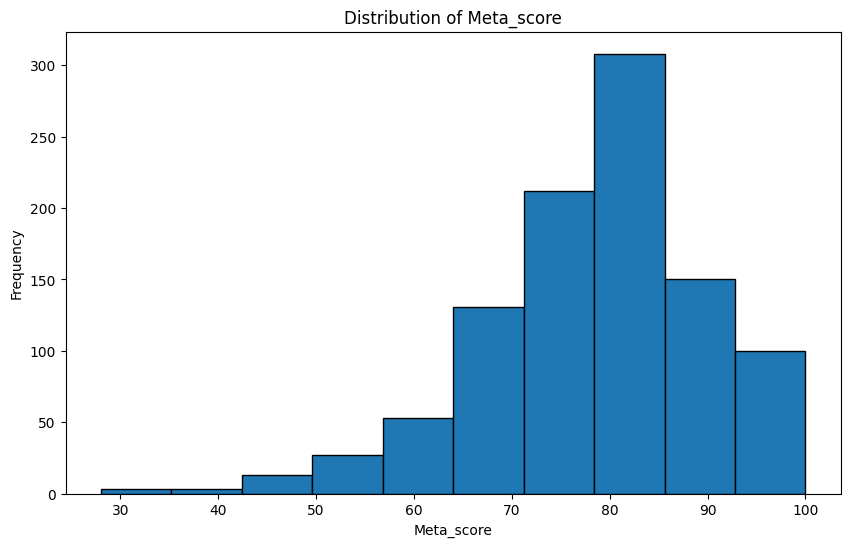

In [58]:
# Plot the "Meta_score" column
plt.figure(figsize=(10, 6))  # Set the figure size (optional)
plt.hist(data['Meta_score'], bins=10, edgecolor='black')  # Create a histogram with 10 bins
plt.xlabel('Meta_score')  # Set the x-axis label
plt.ylabel('Frequency')  # Set the y-axis label
plt.title('Distribution of Meta_score')  # Set the title of the plot
plt.show()  # Display the plot

Number of outliers: 31


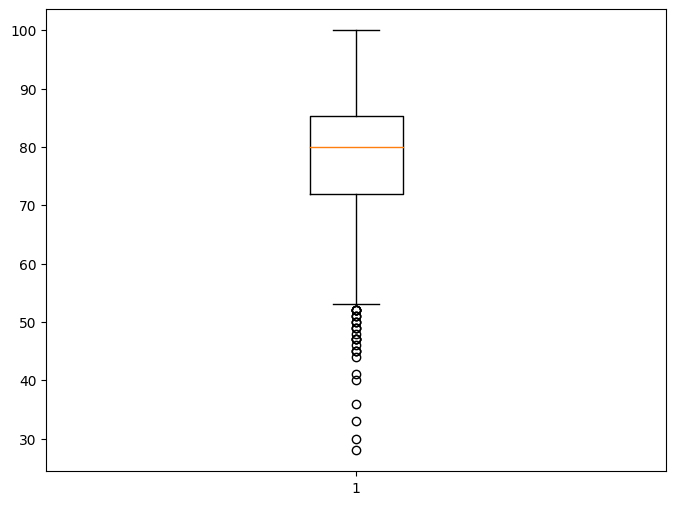

In [60]:
import pandas as pd
import matplotlib.pyplot as plt


# Create a box plot of the "Meta_score" column
plt.figure(figsize=(8, 6))  # Set the figure size (optional)
boxplot = plt.boxplot(data['Meta_score'])
outliers = [flier.get_ydata() for flier in boxplot['fliers']]
num_outliers = len(outliers[0])

# Print the number of outliers
print("Number of outliers:", num_outliers)


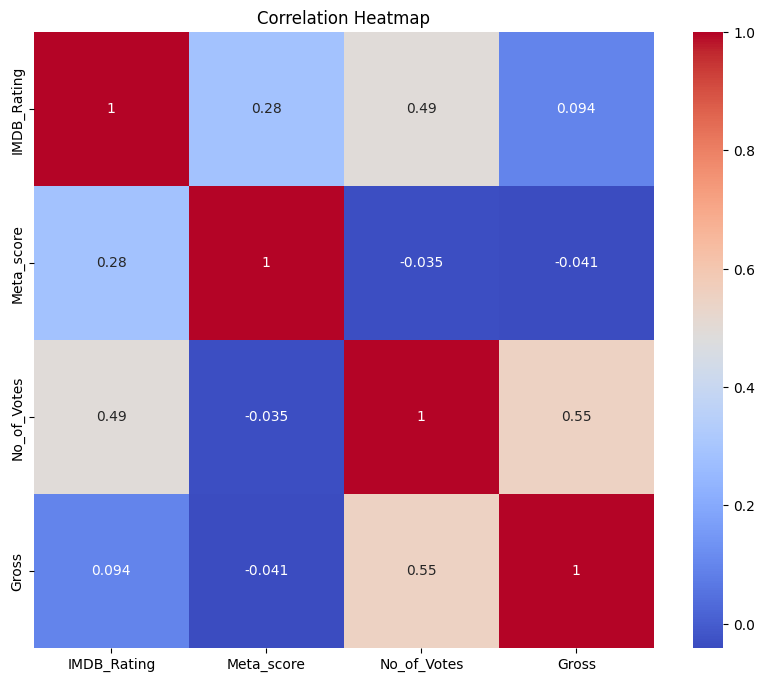

In [62]:


# Select the columns with numerical data
numeric_columns = data.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
corr_matrix = numeric_columns.corr()

# Create the correlation heatmap
plt.figure(figsize=(10, 8))  # Set the figure size (optional)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [63]:
print(data.describe())

       IMDB_Rating   Meta_score   No_of_Votes         Gross
count  1000.000000  1000.000000  1.000000e+03  1.000000e+03
mean      7.949300    78.303635  2.736929e+05  6.761036e+07
std       0.275491    11.437898  3.273727e+05  1.003299e+08
min       7.600000    28.000000  2.508800e+04  1.305000e+03
25%       7.700000    72.000000  5.552625e+04  5.012919e+06
50%       7.900000    80.000000  1.385485e+05  4.238945e+07
75%       8.100000    85.250000  3.741612e+05  7.568471e+07
max       9.300000   100.000000  2.343110e+06  9.366622e+08


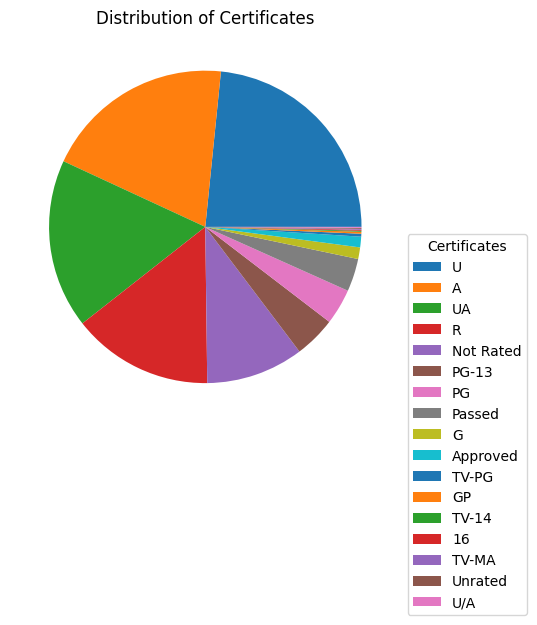

In [67]:
import pandas as pd
import matplotlib.pyplot as plt



# Create a pie chart for the "Certificate" column
certificate_counts = data['Certificate'].value_counts()
plt.figure(figsize=(8, 6))  # Set the figure size (optional)
patches, texts, autotexts = plt.pie(certificate_counts, labels=None, autopct='')

# Add a legend or introduction box
plt.legend(patches, certificate_counts.index, title='Certificates', loc='best', bbox_to_anchor=(1, 0.5))
plt.setp(autotexts, size=10, weight="bold")

plt.title('Distribution of Certificates')
plt.tight_layout()  # Adjust spacing to prevent label overlap
plt.show()


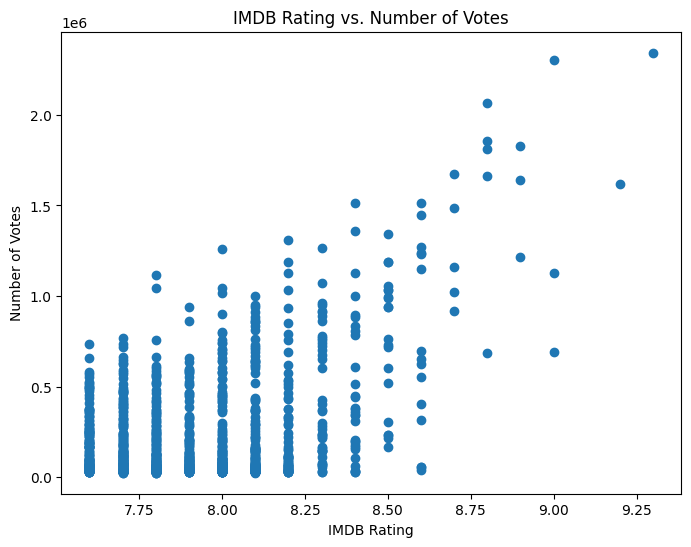

In [72]:


# Create a scatter plot of IMDB_Rating vs. No_of_Votes
plt.figure(figsize=(8, 6))  # Set the figure size (optional)
plt.scatter(data['IMDB_Rating'], data['No_of_Votes'])
plt.xlabel('IMDB Rating')
plt.ylabel('Number of Votes')
plt.title('IMDB Rating vs. Number of Votes')
plt.show()


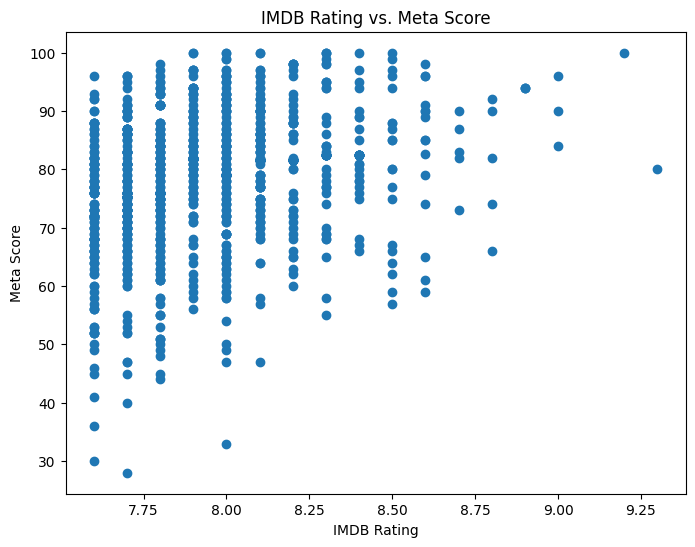

In [73]:
import pandas as pd
import matplotlib.pyplot as plt



# Create a scatter plot of IMDB_Rating vs. Meta_score
plt.figure(figsize=(8, 6))  # Set the figure size (optional)
plt.scatter(data['IMDB_Rating'], data['Meta_score'])
plt.xlabel('IMDB Rating')
plt.ylabel('Meta Score')
plt.title('IMDB Rating vs. Meta Score')
plt.show()


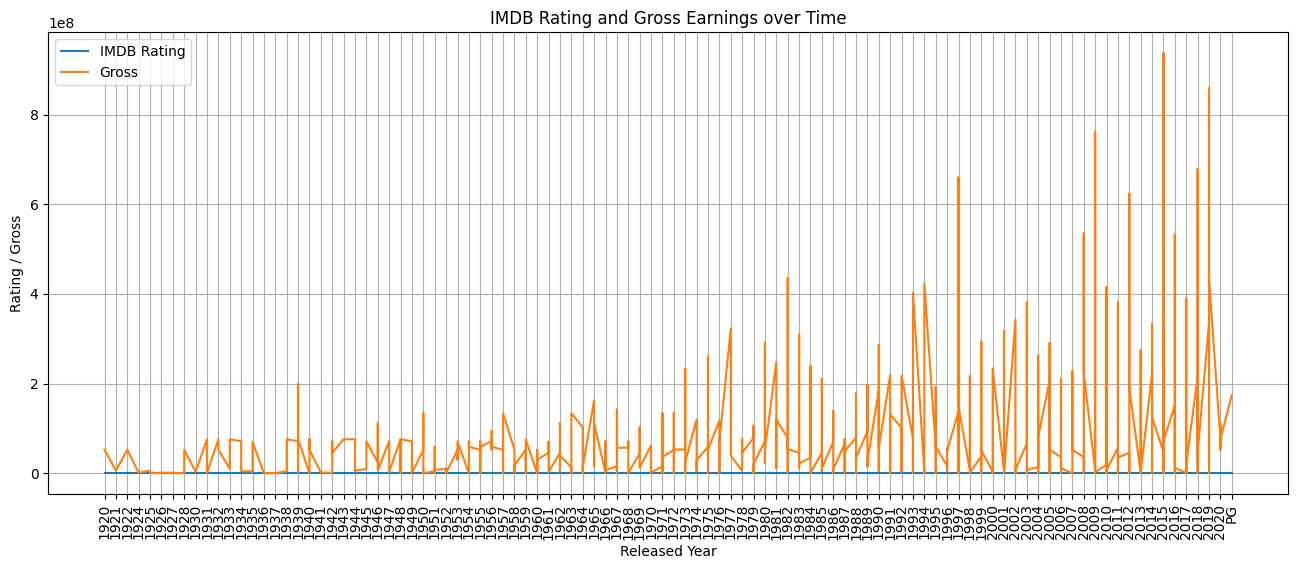

In [81]:


# Sort the data by Released_Year in ascending order
data_sorted = data.sort_values('Released_Year')

# Create a line graph of Released_Year against IMDB_Rating and Gross
plt.figure(figsize=(16, 6))  # Set the figure size (optional)
plt.plot(data_sorted['Released_Year'], data_sorted['IMDB_Rating'], label='IMDB Rating')
plt.plot(data_sorted['Released_Year'], data_sorted['Gross'], label='Gross')
plt.xlabel('Released Year')
plt.ylabel('Rating / Gross')
plt.title('IMDB Rating and Gross Earnings over Time')
plt.legend()
plt.grid(True)

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

plt.show()


In [77]:
# Sort the dataset by IMDB_Rating in descending order
sorted_data = data.sort_values('IMDB_Rating', ascending=False)

# Select the top-rated movies or TV series
top_rated = sorted_data[['Series_Title', 'IMDB_Rating']].head(10)  # Change '10' to the desired number of top-rated entries

# Display the top-rated movies or TV series
print(top_rated)

                                         Series_Title  IMDB_Rating
0                            The Shawshank Redemption          9.3
1                                       The Godfather          9.2
2                                     The Dark Knight          9.0
3                              The Godfather: Part II          9.0
4                                        12 Angry Men          9.0
5       The Lord of the Rings: The Return of the King          8.9
6                                        Pulp Fiction          8.9
7                                    Schindler's List          8.9
10  The Lord of the Rings: The Fellowship of the Ring          8.8
11                                       Forrest Gump          8.8
